## **Maximizing Revenue with Data: 2019 Sales Trends and Product Performance**

### **Business Understanding**

#### **Problem Satement**

A client assigned by getINNOtized, has collected transactional data for the year 2019 but hasn't been able to effectively use this data to improve sales or operational efficiency. They need insights into sales performance, seasonal trends, product popularity, and city-level sales to help drive more sales and streamline operations.

#### **Goal and Objectives**

The main goal is to deliver a comprehensive business intelligence (BI) solution that helps the client:

- Identify trends and seasonality in sales.
- Analyze product performance to discover best- and worst-selling items.
- Compare sales across different time periods (monthly, weekly) for actionable insights.
- Analyze geographical sales performance to identify cities with higher demand.
- Segment products based on price and analyze their contribution to total sales.


#### **Stakeholders**
- Primary Stakeholders: Management team looking for sales and operational insights.
- Secondary Stakeholders: Sales and marketing teams who can use the insights for future campaigns.
- Analysts: Those responsible for deriving and communicating actionable insights.
- Operations Team: Can leverage insights for improving efficiency in delivering products to high-demand areas.

#### **Key Metrics and Success**
- Total Sales Revenue: Monthly and yearly revenue.
- Seasonality Metrics: Monthly/quarterly sales trends.
- Product Performance: Revenue and quantity sold by product.
- Geographic Metrics: Sales distribution by city.
- Product Category Performance: Revenue and quantity sold by product category (high-level vs. basic).
- Operational Efficiency: Timeliness of reporting, ease of extracting actionable insights, and ability to identify growth   opportunities

#### **Hypotheses**
Null Hypothesis (H0): There is no significant seasonality in sales across the year.

Alternate Hypothesis (H1): There is significant seasonality in sales, with certain months showing higher or lower sales trends



#### **Methodology** 
The project follows the CRISP-DM (Cross Industry Standard Process for Data Mining) methodology, structured as: 
- Business Understanding: Define objectives and requirements from the client to drive sales and improve efficiency
- Data Understanding: Collect and explore the dataset, which includes sales data for 2019 across various columns
- Data Preparation: Clean and transform the data, integrating sources from CSV files and a remote database
- Modelling: Apply appropriate data analysis techniques to uncover insights.
- Evaluation: Assess the results against business objectives to ensure they meet the client’s needs
- Deployment: Develop and deploy a Power BI dashboard to visualize the insights

#### **Analytical Questions**
1. How much money did we make this year? 

2. Can we identify any seasonality in the sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities ordered? 

#### **Scope and Constraints**
Scope:
- Analysis will focus on the sales data for 2019, broken down by months, weeks, and product categories.
- Sales data for January to June will be extracted from CSV files, and data for July to December will be pulled from the database.
- The analysis will also involve comparison between high-level and basic products based on unit price thresholds.

Constraints:
- Data integration: Combining two different data sources (CSV and database).
- Time constraints for accessing, cleaning, and preparing the data.
- Potential inconsistencies in data formatting between the first and second halves of the year.


#### **Extra Information**
- The products with a unit price greater than $99.99 will be categorized as high-level products, and those below or equal to $99.99 will be considered basic products. This categorization will be critical for revenue comparisons across product types.
- To answer the questions efficiently, a blend of SQL for database querying and Python/Excel for data analysis and visualization will be required.
- This project must be completed in two weeks 






### **Data Understanding**

#### **Importation of libraries**

In [1]:
#Data manipulation and analysis
import pandas as pd
import numpy as np
from dotenv import dotenv_values
import os

# Managing environment variables
#from dotenv import dotenv_values


import warnings

warnings.filterwarnings('ignore')
 
# Database connectivity
import pyodbc
 
# Database ORM
from sqlalchemy import create_engine
 
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
 

# Machine learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


#### **Data Loading**

In [2]:
#Loading Data from January to June
# List of CSV files (January to June)
csv_files = ['Sales_January_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 
             'Sales_April_2019.csv', 'Sales_May_2019.csv', 'Sales_June_2019.csv']  

# Define the folder path
folder_path = r'C:\Users\USER\Desktop\Sales-Trends-2019\data'  

# Initialize an empty list to store DataFrames
df_firsthalf = []  # Using a more descriptive variable name

# Loop over the CSV files to load each into a DataFrame and append to list
for file in csv_files:
    # Correctly join the folder path and file name
    file_path = os.path.join(folder_path, file)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Append the DataFrame to the list
    df_firsthalf.append(df)
    
    # Print the head of the DataFrame for each month for verification
    print(f"Head of {file.split('_')[1]} Data:")
    print(df.head())  
    print("\n")  # Add a line break for readability

# Now firsthalf_dataframes contains all the DataFrames for January to June


Head of January Data:
  Order ID                   Product Quantity Ordered Price Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       Order Date                       Purchase Address  
0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
4  01/25/19 11:59          387 10th St, Austin, TX 73301  


Head of February Data:
  Order ID                   Product Quantity Ordered Price Each  \
0   150502                    iPhone                1        700   
1   150503     AA Batteries (4-pack)                1 

In [3]:
#Loading Data from July to December 

# Define the connection string
connection_string = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=dap-projects-database.database.windows.net;'
    'DATABASE=dapDB;'
    'UID=capstone;'
    'PWD=Z7x@8pM$2w;'
)

# Connect to the SQL Server database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection to dapDB successful!")
except Exception as e:
    print(f"Error connecting to the database: {e}")
    exit()

# List of table names 
secondhalf = ['Sales_July_2019', 'Sales_August_2019', 'Sales_September_2019',
          'Sales_October_2019', 'Sales_November_2019', 'Sales_December_2019']

# Loop through each table and fetch data
for table in secondhalf:
    print(f"Fetching data from {table}...")
    query = f"SELECT * FROM {table}"  # SQL query to select all data from the table
    
    # Fetch the data into a Pandas DataFrame
    df = pd.read_sql(query, connection)
    
    # Display the first few rows (optional)
    print(df.head())
    
    # Save the data to a CSV file (optional)
    csv_filename = f"{table}.csv"
    df.to_csv(csv_filename, index=False)
    print(f"Data from {table} saved to {csv_filename}")

# Close the connection
connection.close()


Connection to dapDB successful!
Fetching data from Sales_July_2019...
   Order_ID                   Product  Quantity_Ordered  Price_Each  \
0  222910.0  Apple Airpods Headphones               1.0      150.00   
1  222911.0             Flatscreen TV               1.0      300.00   
2  222912.0     AA Batteries (4-pack)               1.0        3.84   
3  222913.0     AA Batteries (4-pack)               1.0        3.84   
4  222914.0    AAA Batteries (4-pack)               5.0        2.99   

           Order_Date                  Purchase_Address  
0 2026-07-19 16:51:00   389 South St, Atlanta, GA 30301  
1 2005-07-19 08:55:00     590 4th St, Seattle, WA 98101  
2 2029-07-19 12:41:00    861 Hill St, Atlanta, GA 30301  
3 2028-07-19 10:15:00   190 Ridge St, Atlanta, GA 30301  
4 2031-07-19 02:13:00  824 Forest St, Seattle, WA 98101  
Data from Sales_July_2019 saved to Sales_July_2019.csv
Fetching data from Sales_August_2019...
   Order_ID                     Product  Quantity_Ordered  P

#### **Insights**
- The datasets retrieved from the one drive are placed in the variable firsthalf and the datasets retrieved from the remote database are in the vaaible secondhalf 

- Column headings accross both datasets are similar but not the same eg. Order ID and Order_ID 

- Order_Date column for the secondhalf dataset needs thorough cleaning. 

- There are variety of products which affect significant price range in the data, from items priced as low as $2.99 (batteries) to as high as $1,700 (Macbook Pro Laptop).

- Products with unit prices above $99.99 should be labeled high-level products otherwise they should be basic level

- Most orders seem to involve single units of high-cost items (e.g., iPhone or Flatscreen TV), but for low-cost items like cables and batteries, customers are purchasing multiple units per order.



#### **EDA & Data Cleaning**

In [4]:
# Concatenate all the DataFrames in df_firsthalf
firsthalf_combined = pd.concat(df_firsthalf, ignore_index=True)

# Verify the concatenated DataFrame
print(firsthalf_combined.head())  


  Order ID                   Product Quantity Ordered Price Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       Order Date                       Purchase Address  
0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
4  01/25/19 11:59          387 10th St, Austin, TX 73301  


In [5]:
# Check for missing values in the first half data
print(firsthalf_combined.isnull().sum())


Order ID            245
Product             245
Quantity Ordered    245
Price Each          245
Order Date          245
Purchase Address    245
dtype: int64


#### **Insights**

- All columns have the same number missing values
- Reseach into the cause of missing values 
- Decide on either imputation or removal to deal with missing values to ensure consistency


<Axes: >

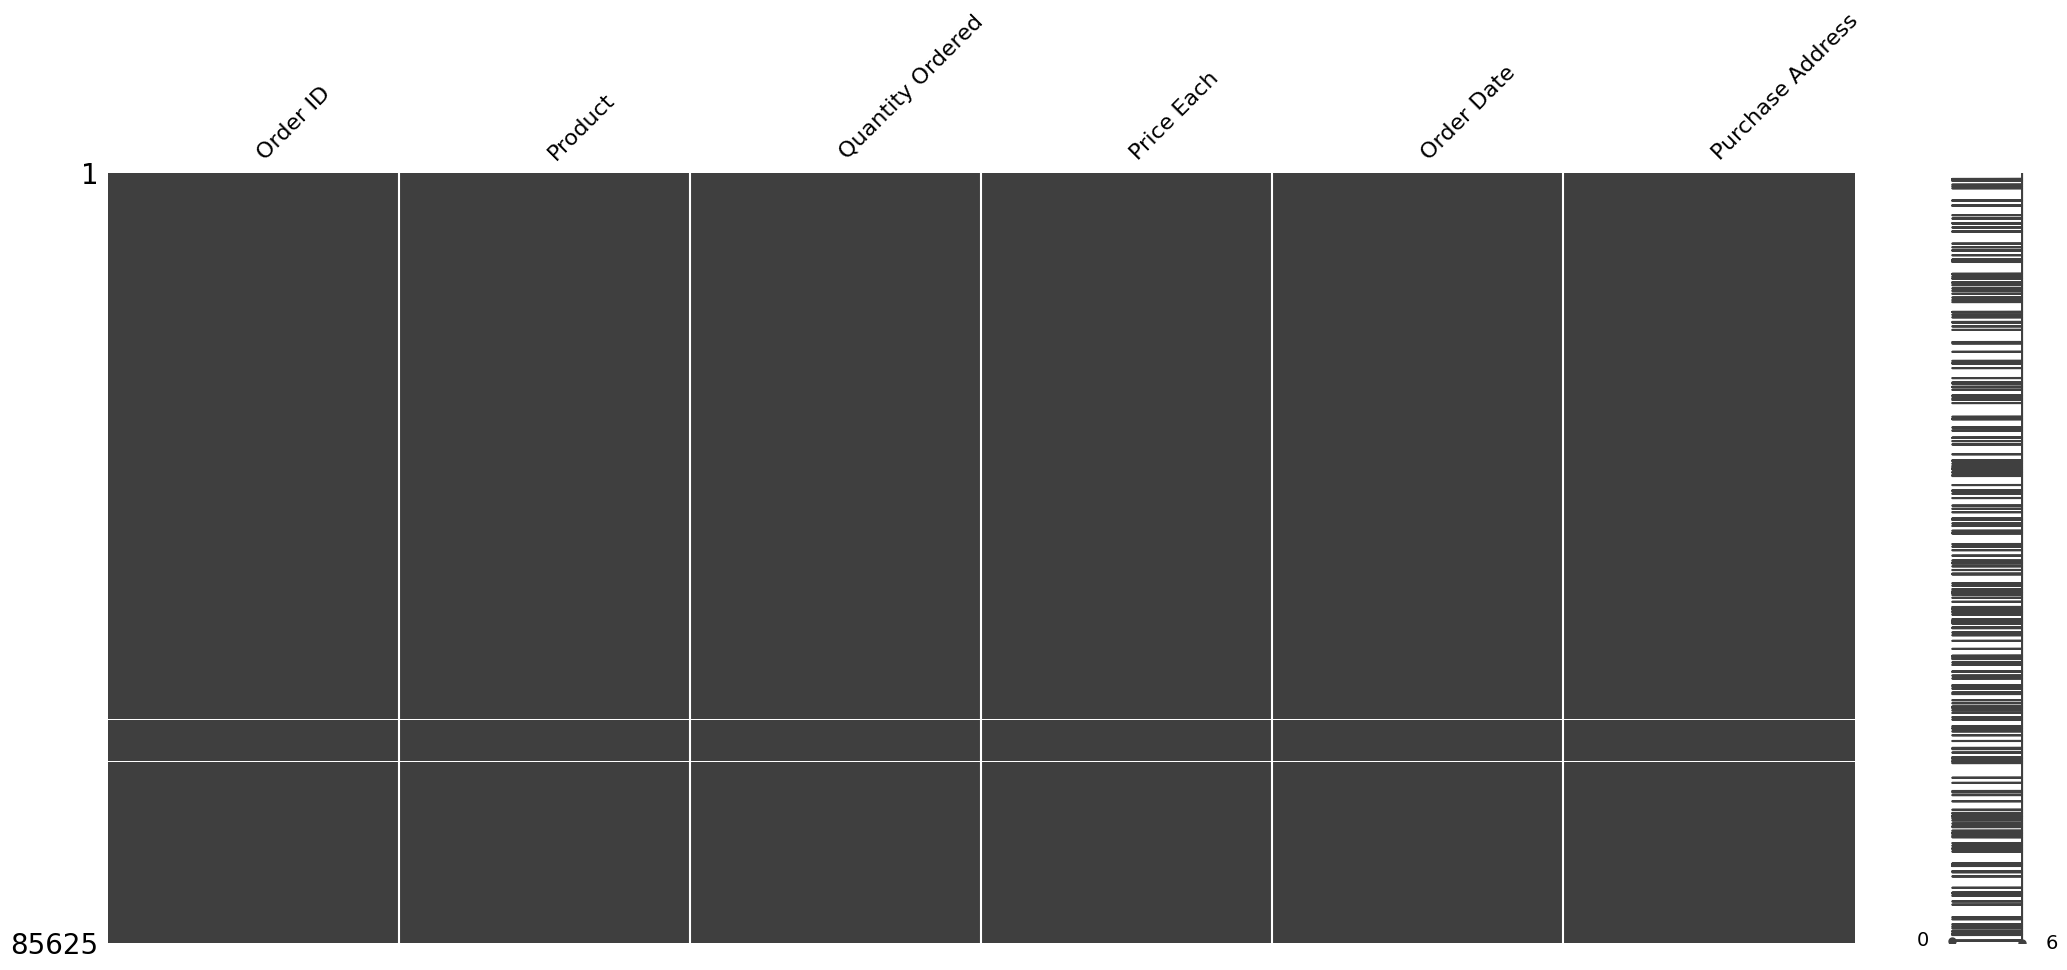

In [6]:
import missingno as msno

msno.matrix(firsthalf_combined)


In [7]:
# Check if missing values are concentrated in a specific range
print(firsthalf_combined[firsthalf_combined['Order Date'].isnull()])


      Order ID Product Quantity Ordered Price Each Order Date Purchase Address
664        NaN     NaN              NaN        NaN        NaN              NaN
678        NaN     NaN              NaN        NaN        NaN              NaN
797        NaN     NaN              NaN        NaN        NaN              NaN
876        NaN     NaN              NaN        NaN        NaN              NaN
1299       NaN     NaN              NaN        NaN        NaN              NaN
...        ...     ...              ...        ...        ...              ...
84570      NaN     NaN              NaN        NaN        NaN              NaN
84643      NaN     NaN              NaN        NaN        NaN              NaN
84662      NaN     NaN              NaN        NaN        NaN              NaN
84735      NaN     NaN              NaN        NaN        NaN              NaN
85355      NaN     NaN              NaN        NaN        NaN              NaN

[245 rows x 6 columns]


In [8]:
# Visualizing `firsthalf_combined`in Excel
firsthalf_combined.to_excel('merged_data.xlsx', index=False)

import os
print(os.getcwd())



c:\Users\USER\Desktop\Sales-Trends-2019\notebooks


In [14]:
# Drop rows with any missing values and assign the result to a new variable
firsthalf_cleaned = firsthalf_combined.dropna(how='any')

# Verify no more missing values
print(firsthalf_cleaned.isnull().sum())


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [17]:

# Check for duplicate rows
duplicates = firsthalf_cleaned[firsthalf_cleaned.duplicated()]

# Display the duplicate rows
print("Duplicate rows:")
print(duplicates)


Duplicate rows:
       Order ID                     Product  Quantity Ordered  Price Each  \
875      142071       AA Batteries (4-pack)                 1        3.84   
1102   Order ID                     Product  Quantity Ordered  Price Each   
1194   Order ID                     Product  Quantity Ordered  Price Each   
1897   Order ID                     Product  Quantity Ordered  Price Each   
2463   Order ID                     Product  Quantity Ordered  Price Each   
...         ...                         ...               ...         ...   
82986    220392    Lightning Charging Cable                 1       14.95   
83050  Order ID                     Product  Quantity Ordered  Price Each   
83490    220882    Lightning Charging Cable                 1       14.95   
84359    221711  Bose SoundSport Headphones                 1       99.99   
85307  Order ID                     Product  Quantity Ordered  Price Each   

           Order Date                      Purchase Address

In [18]:
# Find exact duplicates across all columns
exact_duplicates = firsthalf_cleaned[firsthalf_cleaned.duplicated(keep=False)]
print(f"Number of exact duplicates: {len(exact_duplicates)}")
print(exact_duplicates.head())  # Display the first few rows of exact duplicates


Number of exact duplicates: 376
      Order ID                Product  Quantity Ordered  Price Each  \
874     142071  AA Batteries (4-pack)                 1        3.84   
875     142071  AA Batteries (4-pack)                 1        3.84   
1073  Order ID                Product  Quantity Ordered  Price Each   
1102  Order ID                Product  Quantity Ordered  Price Each   
1194  Order ID                Product  Quantity Ordered  Price Each   

          Order Date              Purchase Address  
874   01/17/19 23:02  131 2nd St, Boston, MA 02215  
875   01/17/19 23:02  131 2nd St, Boston, MA 02215  
1073      Order Date              Purchase Address  
1102      Order Date              Purchase Address  
1194      Order Date              Purchase Address  


In [25]:
# Find duplicates based on 'Order ID' only
order_id_duplicates = firsthalf_cleaned[firsthalf_cleaned.duplicated(subset='Order ID', keep=False)]
print(f"Number of 'Order ID' duplicates: {len(order_id_duplicates)}")
print(order_id_duplicates.head())  # Display the first few rows of duplicates by Order ID


Number of 'Order ID' duplicates: 7062
    Order ID                   Product  Quantity Ordered  Price Each  \
41    141275      USB-C Charging Cable               1.0       11.95   
42    141275          Wired Headphones               1.0       11.99   
57    141290  Apple Airpods Headphones               1.0      150.00   
58    141290     AA Batteries (4-pack)               3.0        3.84   
133   141365           Vareebadd Phone               1.0      400.00   

             Order Date                        Purchase Address  
41  2019-01-07 16:06:00         610 Walnut St, Austin, TX 73301  
42  2019-01-07 16:06:00         610 Walnut St, Austin, TX 73301  
57  2019-01-02 08:25:00         4 1st St, Los Angeles, CA 90001  
58  2019-01-02 08:25:00         4 1st St, Los Angeles, CA 90001  
133 2019-01-10 11:19:00  20 Dogwood St, New York City, NY 10001  


In [26]:
# Drop exact duplicates and 'Order ID' duplicates but keep repeat purchases
cleaned_data = firsthalf_cleaned.drop_duplicates(keep='first')

# Display the cleaned dataset
print(f"Number of rows after cleaning: {len(cleaned_data)}")


Number of rows after cleaning: 85113


In [22]:
# Convert 'Order Date' to datetime format
firsthalf_cleaned['Order Date'] = pd.to_datetime(firsthalf_cleaned['Order Date'], errors='coerce')

# Convert 'Quantity Ordered' and 'Price Each' to numeric
firsthalf_cleaned['Quantity Ordered'] = pd.to_numeric(firsthalf_cleaned['Quantity Ordered'], errors='coerce')
firsthalf_cleaned['Price Each'] = pd.to_numeric(firsthalf_cleaned['Price Each'], errors='coerce')


#### **Insights after cleaning**
- The team observed that, missing values in the first column were consistent with the missing values in the other four columns. Therefore, all columns were dropped

In [ ]:
# Concatenate all the DataFrames in df_firsthalf
firsthalf_combined = pd.concat(df_firsthalf, ignore_index=True)

# Verify the concatenated DataFrame
print(firsthalf_combined.head())  


In [23]:
#Concatenating all the datasets in secondhalf
secondhalf = pd.concat(secondhalf, ignore_index=True)

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

### **Data Preparation** 

### **Modelling and Evaluation**

### **Deployment**